In [1]:
import sys
from pathlib import Path

project_root = Path().resolve().parent
sys.path.append(str(project_root))

In [2]:
import json
import pandas as pd
from src.evaluation.answer_evaluator import AnswerEvaluator

In [3]:
with open('../results/detailed_results_20241226_221122.json') as f:
    results = json.load(f)

In [4]:
evaluator = AnswerEvaluator()

In [7]:
empty_evalutaion = {
    'smape': None,
    'prefix_match': None,
    'suffix_match': None,
    'decimal_places_match': None
}

In [8]:
for result in results:
    evaluation = []
    for expected, processed in zip(result['expected_answers'], result['processed_answers']):
        try:
            evaluation.append(evaluator.compare_answers(processed, expected))
        except:
            print(f"Could not process {result['entry_id']}: processed={processed}, expected={expected}")
            evaluation.append(empty_evalutaion)
    result['evaluation'] = evaluation

Could not process entry_0497: processed=inf%, expected=15.6%
Could not process entry_1648: processed=3 years, expected=
Could not process entry_0006: processed=inf%, expected=15.6%
Could not process entry_0791: processed=$1.0, expected=$ 8.3 < interest income < $ 41.1 . or the interest income would be between $ 8.3 million and $ 41.1 million
Could not process entry_1081: processed=-100.77%, expected=
Could not process entry_1000: processed=31250, expected=
Could not process entry_2072: processed=0, expected=no
Could not process entry_2315: processed=1, expected=yes
Could not process entry_2175: processed=44.17%, expected=
Could not process entry_0681: processed=$35411, expected=$ 35411 or 9.8% increase
Could not process entry_2782: processed=None, expected=18962
Could not process entry_0128: processed=0, expected=no
Could not process entry_0937: processed=8.18%, expected=
Could not process entry_3007: processed=0.20%, expected=
Could not process entry_1849: processed=1.07, expected=[22

In [9]:
df = pd.DataFrame(results)
list_columns = ['questions', 'expected_answers', 'llm_responses', 'processed_answers', 'evaluation']
df = df.explode(list_columns).reset_index(drop=True)

In [10]:
eval_df = pd.json_normalize(df['evaluation'])
results_df = df.drop(columns=['evaluation', 'llm_responses']).merge(eval_df, left_index=True, right_index=True)

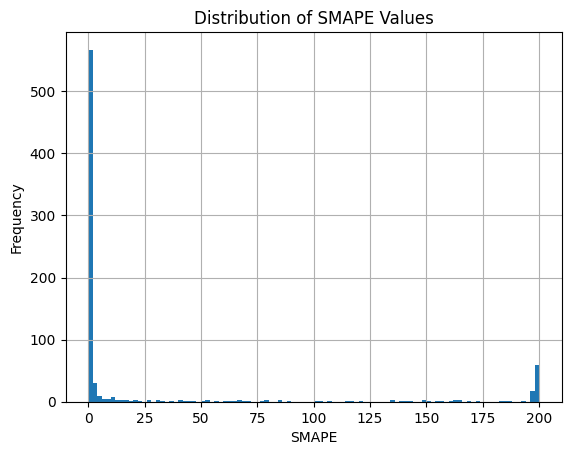

In [49]:
results_df['smape'].hist(bins=100)
plt.title('Distribution of SMAPE Values')
plt.xlabel('SMAPE')
plt.ylabel('Frequency')
plt.show()

In [44]:
results_df[results_df['smape'].between(0,10, inclusive='both')]

,entry_id,questions,expected_answers,processed_answers,smape,prefix_match,suffix_match,decimal_places_match,percentage,change,...,average,total,comparison,roi,revenue,income,expenses,assets,liabilities,decrease
0,entry_2212,what is the percent change in research and dev...,187%,187.40%,0.213675,True,True,False,True,True,...,False,False,False,False,False,False,True,False,False,False
2,entry_1375,in 2008 what was the ratio of the direct amoun...,2.62,2.62,0.000000,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,entry_1375,what is the percentage of amount ceded to dire...,39.8%,39.76%,0.100553,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
5,entry_0960,"what was the total cost of share repurchases ,...",8287.1,$8287.14M,0.000483,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
6,entry_1170,how many years did it take to close the pilgri...,2,2,0.000000,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,entry_0571,what was the percentage change in earnings per...,22%,22.35%,1.578354,True,True,False,True,True,...,False,False,False,False,False,True,False,False,False,False
788,entry_0914,what is the average balance of letters of cred...,46.7,$46.7 million,0.000000,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
789,entry_0914,what is the percentage change in interest expe...,15.5%,15.46%,0.258398,True,True,False,True,True,...,False,False,False,False,False,False,True,False,False,False
790,entry_1003,what was the percentage change in cash from op...,35%,35.41%,1.164607,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [46]:
results_df[results_df['smape'].between(10, 195, inclusive='right')]

,entry_id,questions,expected_answers,processed_answers,smape,prefix_match,suffix_match,decimal_places_match,percentage,change,...,average,total,comparison,roi,revenue,income,expenses,assets,liabilities,decrease
1,entry_1309,if risk-weighted assets held flat how much in ...,124137,$ 9291.20 million,172.146218,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
16,entry_1135,"for option expiration dates in 2009 , what was...",17500,35000,66.666667,True,True,True,False,False,...,True,False,False,False,False,False,False,False,False,False
19,entry_1061,what was the percentage increase of income for...,38.5%,34.16%,11.946050,True,True,False,True,True,...,False,False,False,False,False,True,False,False,False,False
20,entry_1843,what is the expected increase in the pension e...,37.79%,$ 28.8,27.001051,False,False,False,False,True,...,False,False,False,False,False,False,True,False,False,False
23,entry_0651,what percent change did the fx impact have on ...,-3.4%,-3.91%,13.953488,True,True,False,True,True,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,entry_0187,what is the percentual increase in the resulti...,189%,289.31%,41.943509,True,True,False,True,True,...,False,False,False,False,False,True,False,False,False,False
742,entry_1556,what is the decrease observed in the capitaliz...,33.40%,$ 16.4,68.273092,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
758,entry_1839,what percentage of outstanding amounts under t...,4%,4.49%,11.542992,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
781,entry_2418,how much has cash equivalents and marketable s...,33.9% decrease,$ 409.1,169.390519,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True


In [47]:
results_df[results_df['smape'].between(195, 200, inclusive='right')]

,entry_id,questions,expected_answers,processed_answers,smape,prefix_match,suffix_match,decimal_places_match,percentage,change,...,average,total,comparison,roi,revenue,income,expenses,assets,liabilities,decrease
4,entry_1112,"considering the years 2007-2008 , what was the...",31%,$ 8345,198.519580,False,False,True,False,True,...,False,False,False,False,False,False,True,False,False,False
10,entry_1124,what is the percent change in information tech...,15.4%,-13.33%,200.000000,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
22,entry_1944,how much of the securities borrowed in 2008 we...,16.8%,$0.0 billion,200.000000,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
31,entry_1812,what is the return on investment for applied m...,11.5%,-11.46%,200.000000,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
48,entry_1902,what is the annual compensation expense for th...,1692307,$15.97,199.996225,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,entry_2932,what was the approximate purchase price for th...,85606.7,$ 153500000,199.777045,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
770,entry_0108,what is the amount of cash raised from the iss...,4.5,$0.00M,200.000000,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
783,entry_2233,what was the net tax expense for the 3 years e...,-8.2,$32.4 million,200.000000,False,False,True,False,True,...,False,False,False,False,False,False,True,False,False,False
791,entry_1126,what was the percentage decrease from 2007 for...,1.47%,-1.47%,200.000000,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True


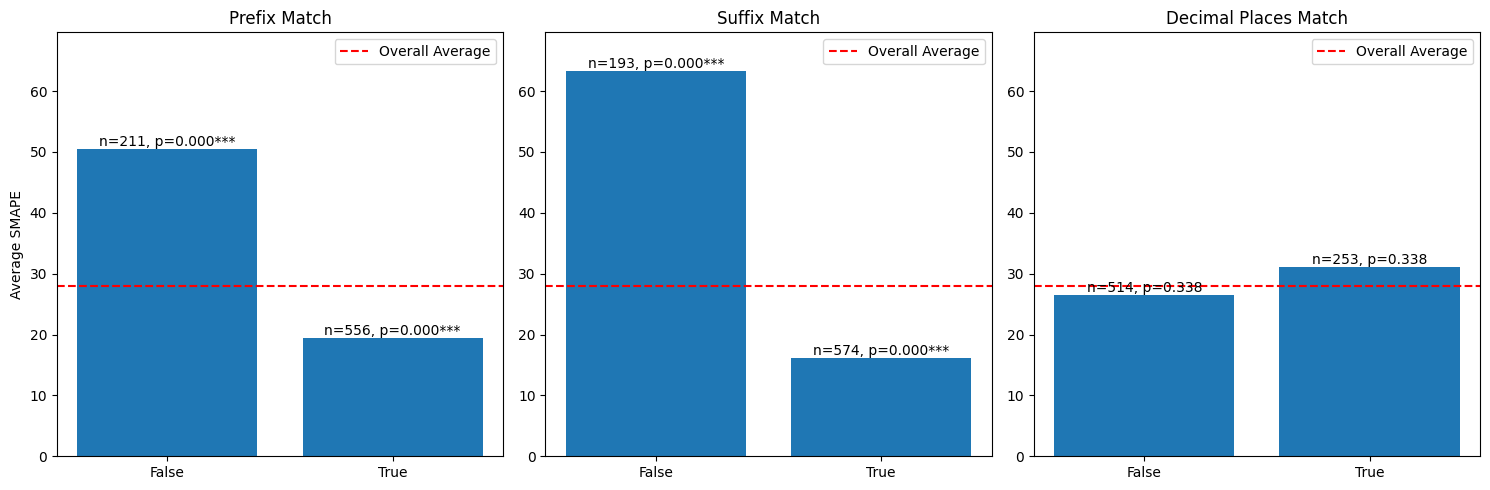


Overall Average SMAPE: 28.008

Average SMAPE by match type:

Prefix Match:
prefix_match
False    50.553787
True     19.451473
Name: smape, dtype: float64
Counts: prefix_match
True     556
False    211
Name: count, dtype: int64
P-value: 0.000

Suffix Match:
suffix_match
False    63.306650
True     16.138823
Name: smape, dtype: float64
Counts: suffix_match
True     574
False    193
Name: count, dtype: int64
P-value: 0.000

Decimal Places Match:
decimal_places_match
False    26.452539
True     31.167047
Name: smape, dtype: float64
Counts: decimal_places_match
False    514
True     253
Name: count, dtype: int64
P-value: 0.338


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Calculate overall average SMAPE
overall_avg = results_df['smape'].mean()

# Create figure with 3 subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Get the maximum SMAPE value for setting consistent y-axis
max_smape = max([
    results_df.groupby('prefix_match')['smape'].mean().max(),
    results_df.groupby('suffix_match')['smape'].mean().max(),
    results_df.groupby('decimal_places_match')['smape'].mean().max()
])

# Get value counts for each match type
prefix_counts = results_df['prefix_match'].value_counts()
suffix_counts = results_df['suffix_match'].value_counts()
decimal_counts = results_df['decimal_places_match'].value_counts()

# Function to perform t-test and get p-value
def get_p_value(df, column):
    true_data = df[df[column] == True]['smape']
    false_data = df[df[column] == False]['smape']
    _, p_value = stats.ttest_ind(true_data.dropna(), false_data.dropna())
    return p_value

# Prefix match
prefix_avg = results_df.groupby('prefix_match')['smape'].mean()
prefix_p = get_p_value(results_df, 'prefix_match')
bars1 = ax1.bar(['False', 'True'], prefix_avg)
ax1.axhline(y=overall_avg, color='r', linestyle='--', label='Overall Average')
ax1.set_title('Prefix Match')
ax1.set_ylabel('Average SMAPE')
ax1.legend()
ax1.set_ylim(0, max_smape * 1.1)

# Add count and p-value annotations
for idx, bar in enumerate(bars1):
    count = prefix_counts[idx == 1]  # True is 1, False is 0
    stars = ''
    if prefix_p < 0.001:
        stars = '***'
    elif prefix_p < 0.01:
        stars = '**'
    elif prefix_p < 0.05:
        stars = '*'
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'n={count}, p={prefix_p:.3f}{stars}', ha='center', va='bottom')

# Suffix match
suffix_avg = results_df.groupby('suffix_match')['smape'].mean()
suffix_p = get_p_value(results_df, 'suffix_match')
bars2 = ax2.bar(['False', 'True'], suffix_avg)
ax2.axhline(y=overall_avg, color='r', linestyle='--', label='Overall Average')
ax2.set_title('Suffix Match')
ax2.legend()
ax2.set_ylim(0, max_smape * 1.1)

# Add count and p-value annotations
for idx, bar in enumerate(bars2):
    count = suffix_counts[idx == 1]  # True is 1, False is 0
    stars = ''
    if suffix_p < 0.001:
        stars = '***'
    elif suffix_p < 0.01:
        stars = '**'
    elif suffix_p < 0.05:
        stars = '*'
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'n={count}, p={suffix_p:.3f}{stars}', ha='center', va='bottom')

# Decimal places match
decimal_avg = results_df.groupby('decimal_places_match')['smape'].mean()
decimal_p = get_p_value(results_df, 'decimal_places_match')
bars3 = ax3.bar(['False', 'True'], decimal_avg)
ax3.axhline(y=overall_avg, color='r', linestyle='--', label='Overall Average')
ax3.set_title('Decimal Places Match')
ax3.legend()
ax3.set_ylim(0, max_smape * 1.1)

# Add count and p-value annotations
for idx, bar in enumerate(bars3):
    count = decimal_counts[idx == 1]  # True is 1, False is 0
    stars = ''
    if decimal_p < 0.001:
        stars = '***'
    elif decimal_p < 0.01:
        stars = '**'
    elif decimal_p < 0.05:
        stars = '*'
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'n={count}, p={decimal_p:.3f}{stars}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Print numerical results with counts and p-values
print(f"\nOverall Average SMAPE: {overall_avg:.3f}")
print("\nAverage SMAPE by match type:")
print("\nPrefix Match:")
print(prefix_avg)
print("Counts:", prefix_counts)
print(f"P-value: {prefix_p:.3f}")
print("\nSuffix Match:")
print(suffix_avg)
print("Counts:", suffix_counts)
print(f"P-value: {suffix_p:.3f}")
print("\nDecimal Places Match:")
print(decimal_avg)
print("Counts:", decimal_counts)
print(f"P-value: {decimal_p:.3f}")

In [36]:
question_categories = {
            'percentage': ['percent', 'percentage', '%'],
            'change': ['change', 'difference', 'increased', 'decreased', 'reduction', 'decline', 'decrease', 'increase'],
            'growth': ['growth', 'grew', 'rate of', 'growth rate'],
            'decrease': ['decrease', 'reduction', ],
            'ratio': ['ratio', 'proportion', 'portion'],
            'average': ['average', 'mean'],
            'total': ['total', 'sum', 'combined', 'aggregate'],
            'comparison': ['compared to', 'versus', 'than', 'compare'],
            'roi': ['roi', 'return on investment'],
        }
        
financial_terms = {
            'revenue': ['revenue', 'sales'],
            'income': ['income', 'earnings', 'profit', 'margin'],
            'expenses': ['expense', 'cost', 'expenditure'],
            'assets': ['asset', 'property', 'equipment'],
            'liabilities': ['liability', 'debt', 'obligation']
        }

In [37]:
for category in question_categories.keys():
    results_df[category] = results_df['questions'].apply(lambda x: any(keyword in x for keyword in question_categories[category]))

In [38]:
results_df

,entry_id,questions,expected_answers,processed_answers,smape,prefix_match,suffix_match,decimal_places_match,percentage,change,...,average,total,comparison,roi,revenue,income,expenses,assets,liabilities,decrease
0,entry_2212,what is the percent change in research and dev...,187%,187.40%,0.213675,True,True,False,True,True,...,False,False,False,False,False,False,True,False,False,False
1,entry_1309,if risk-weighted assets held flat how much in ...,124137,$ 9291.20 million,172.146218,False,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
2,entry_1375,in 2008 what was the ratio of the direct amoun...,2.62,2.62,0.000000,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,entry_1375,what is the percentage of amount ceded to dire...,39.8%,39.76%,0.100553,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,entry_1112,"considering the years 2007-2008 , what was the...",31%,$ 8345,198.519580,False,False,True,False,True,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,entry_1003,what was the percentage change in cash from op...,35%,35.41%,1.164607,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,False
791,entry_1126,what was the percentage decrease from 2007 for...,1.47%,-1.47%,200.000000,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
792,entry_0102,what is the percentage difference in the numbe...,278%,2277.78%,156.490778,True,True,False,True,True,...,False,False,True,False,False,False,False,False,False,False
793,entry_0456,what was the percentage reduction in the segme...,-18.8%,18.75%,200.000000,True,True,False,True,True,...,False,False,False,False,False,False,False,False,False,True


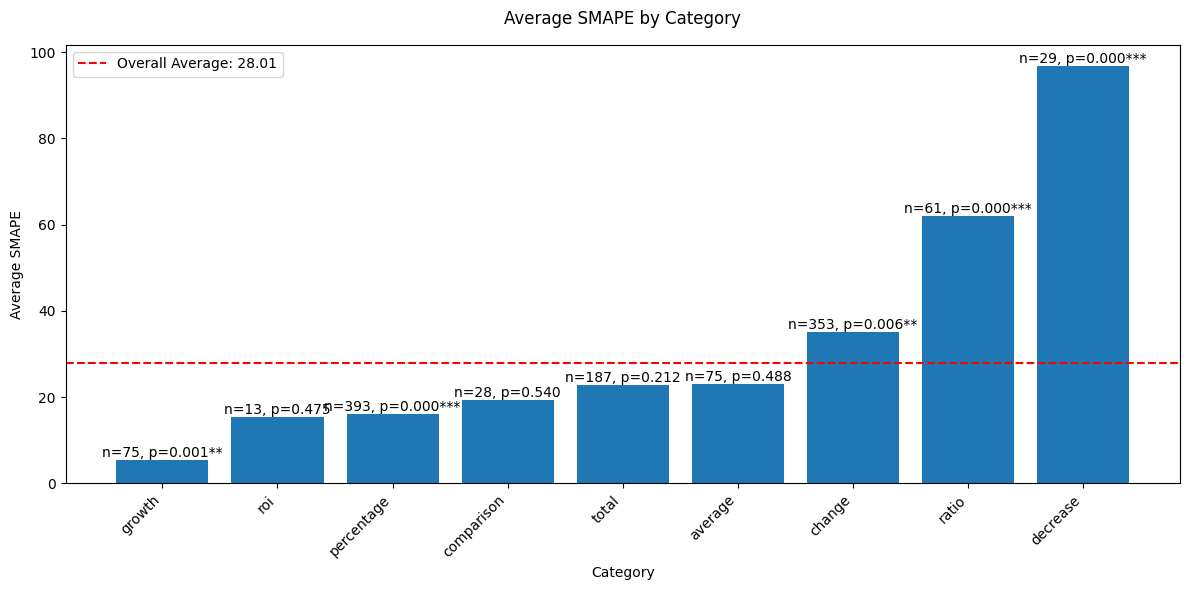


Detailed Results:
  category  avg_smape  count      p_value
    growth   5.449020     75 1.397229e-03
       roi  15.422867     13 4.752306e-01
percentage  16.015304    393 1.537613e-07
comparison  19.345700     28 5.402925e-01
     total  22.851872    187 2.122305e-01
   average  23.018358     75 4.877700e-01
    change  35.022191    353 6.291176e-03
     ratio  61.955612     61 2.055494e-05
  decrease  96.837539     29 9.403841e-09


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Calculate average SMAPE for each category
results = []
for category in question_categories:
    category_data = results_df[results_df[category] == True]['smape']
    other_data = results_df[results_df[category] == False]['smape']
    
    # Calculate average SMAPE and perform t-test
    avg_smape = category_data.mean()
    
    # Only perform t-test if we have data in both groups
    if len(category_data) > 0 and len(other_data) > 0:
        # Remove NaN values before t-test
        category_data_clean = category_data.dropna()
        other_data_clean = other_data.dropna()
        if len(category_data_clean) > 0 and len(other_data_clean) > 0:
            t_stat, p_value = stats.ttest_ind(category_data_clean, other_data_clean)
        else:
            p_value = np.nan
    else:
        p_value = np.nan
        
    results.append({
        'category': category,
        'avg_smape': avg_smape,
        'count': len(category_data),
        'p_value': p_value
    })

# Convert results to DataFrame
chart_df = pd.DataFrame(results).sort_values(by='avg_smape')

# Calculate overall average SMAPE
overall_avg = results_df['smape'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(chart_df['category'], chart_df['avg_smape'])

# Add horizontal line for overall average
plt.axhline(y=overall_avg, color='r', linestyle='--', label=f'Overall Average: {overall_avg:.2f}')

# Customize the plot
plt.title('Average SMAPE by Category', pad=15)
plt.xlabel('Category')
plt.ylabel('Average SMAPE')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add combined count and p-value labels on top of each bar
for i in range(len(chart_df)):
    p_val = chart_df['p_value'].iloc[i]
    stars = ''
    if p_val < 0.001:
        stars = '***'
    elif p_val < 0.01:
        stars = '**'
    elif p_val < 0.05:
        stars = '*'
    
    # Combined text on one line
    text = f'n={chart_df["count"].iloc[i]}, p={p_val:.3f}{stars}'
    
    plt.text(i, chart_df['avg_smape'].iloc[i],
             text,
             ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print the numerical results
print("\nDetailed Results:")
print(chart_df.to_string(index=False))

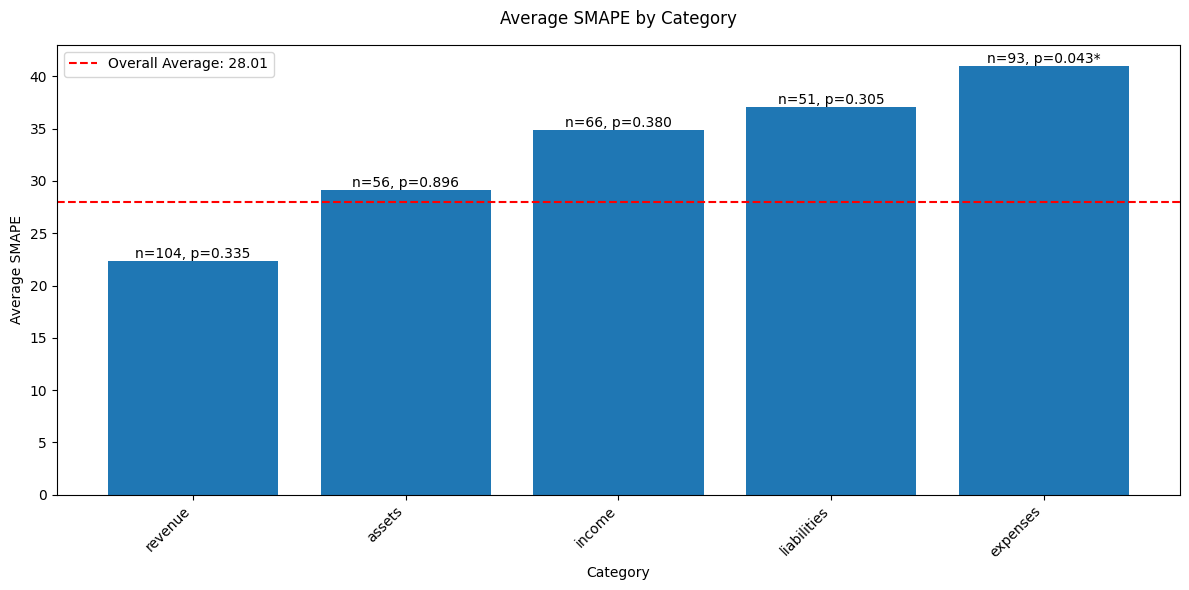


Detailed Results:
   category  avg_smape  count  p_value
    revenue  22.347578    104 0.335378
     assets  29.107894     56 0.895927
     income  34.851755     66 0.380467
liabilities  37.084519     51 0.305488
   expenses  40.974159     93 0.043457


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Calculate average SMAPE for each category
results = []
for category in financial_terms:
    category_data = results_df[results_df[category] == True]['smape']
    other_data = results_df[results_df[category] == False]['smape']
    
    # Calculate average SMAPE and perform t-test
    avg_smape = category_data.mean()
    
    # Only perform t-test if we have data in both groups
    if len(category_data) > 0 and len(other_data) > 0:
        # Remove NaN values before t-test
        category_data_clean = category_data.dropna()
        other_data_clean = other_data.dropna()
        if len(category_data_clean) > 0 and len(other_data_clean) > 0:
            t_stat, p_value = stats.ttest_ind(category_data_clean, other_data_clean)
        else:
            p_value = np.nan
    else:
        p_value = np.nan
        
    results.append({
        'category': category,
        'avg_smape': avg_smape,
        'count': len(category_data),
        'p_value': p_value
    })

# Convert results to DataFrame
chart_df = pd.DataFrame(results).sort_values(by='avg_smape')

# Calculate overall average SMAPE
overall_avg = results_df['smape'].mean()

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(chart_df['category'], chart_df['avg_smape'])

# Add horizontal line for overall average
plt.axhline(y=overall_avg, color='r', linestyle='--', label=f'Overall Average: {overall_avg:.2f}')

# Customize the plot
plt.title('Average SMAPE by Category', pad=15)
plt.xlabel('Category')
plt.ylabel('Average SMAPE')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add combined count and p-value labels on top of each bar
for i in range(len(chart_df)):
    p_val = chart_df['p_value'].iloc[i]
    stars = ''
    if p_val < 0.001:
        stars = '***'
    elif p_val < 0.01:
        stars = '**'
    elif p_val < 0.05:
        stars = '*'
    
    # Combined text on one line
    text = f'n={chart_df["count"].iloc[i]}, p={p_val:.3f}{stars}'
    
    plt.text(i, chart_df['avg_smape'].iloc[i],
             text,
             ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print the numerical results
print("\nDetailed Results:")
print(chart_df.to_string(index=False))